In [1]:
import scanpy as sc

selected_cluster = sc.read("processed_files/significant_subpopulation/cluster2424.h5ad")

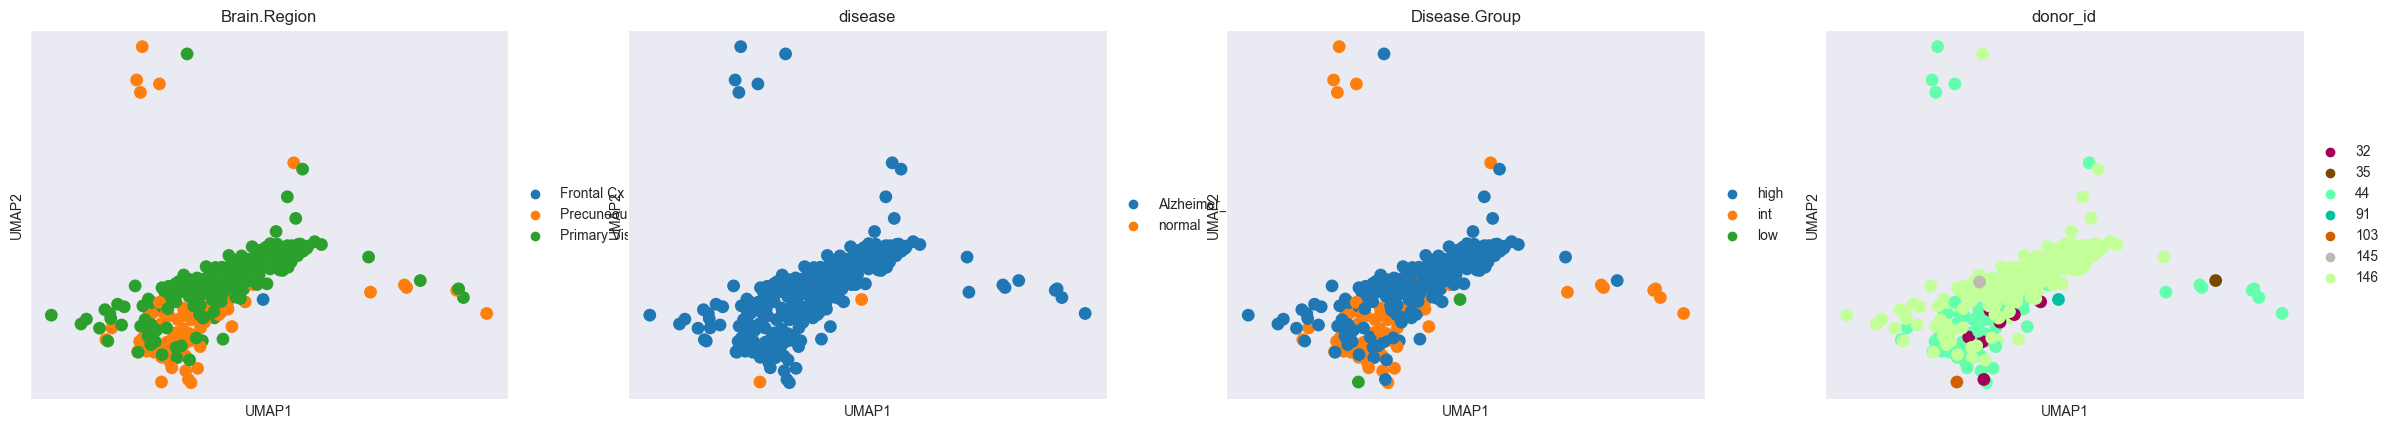

In [2]:
sc.pl.umap(selected_cluster, color=['Brain.Region', "disease", "Disease.Group", 'donor_id'])

In [3]:
selected_cluster.obs["Disease.Group"]

ACTATGGGTTGCATCA-C0089     int
AGGTCATGTAGGTGCA-C0089     int
AGAGAGCTCTTCTAAC-C0090     int
AACCCAAAGAATCGCG-C0108    high
AGACCATAGATACCAA-C0108    high
                          ... 
AGTACTGGTCACAGAG-C0110    high
GCCCTTTACCAG-D0093        high
AGGATTAATAAA-D0121         int
TTTCACAAGCGACAGT-C0108    high
TAACCAGAGCTTTGTG-C0109    high
Name: Disease.Group, Length: 354, dtype: category
Categories (3, object): ['high', 'int', 'low']

In [4]:
selected_cluster.obs["donor_id"]

ACTATGGGTTGCATCA-C0089     44
AGGTCATGTAGGTGCA-C0089     44
AGAGAGCTCTTCTAAC-C0090     44
AACCCAAAGAATCGCG-C0108    146
AGACCATAGATACCAA-C0108    146
                         ... 
AGTACTGGTCACAGAG-C0110    145
GCCCTTTACCAG-D0093         35
AGGATTAATAAA-D0121         44
TTTCACAAGCGACAGT-C0108    146
TAACCAGAGCTTTGTG-C0109    146
Name: donor_id, Length: 354, dtype: category
Categories (7, object): ['32', '35', '44', '91', '103', '145', '146']

In [5]:
selected_cluster.obs["Brain.Region"]

ACTATGGGTTGCATCA-C0089            Precuneous (BA7)
AGGTCATGTAGGTGCA-C0089            Precuneous (BA7)
AGAGAGCTCTTCTAAC-C0090            Precuneous (BA7)
AACCCAAAGAATCGCG-C0108    Primary Visual Cx (BA17)
AGACCATAGATACCAA-C0108    Primary Visual Cx (BA17)
                                    ...           
AGTACTGGTCACAGAG-C0110    Primary Visual Cx (BA17)
GCCCTTTACCAG-D0093        Primary Visual Cx (BA17)
AGGATTAATAAA-D0121        Primary Visual Cx (BA17)
TTTCACAAGCGACAGT-C0108    Primary Visual Cx (BA17)
TAACCAGAGCTTTGTG-C0109    Primary Visual Cx (BA17)
Name: Brain.Region, Length: 354, dtype: category
Categories (3, object): ['Frontal Cx (BA9)', 'Precuneous (BA7)', 'Primary Visual Cx (BA17)']

In [6]:
selected_cluster.obs["disease"]

ACTATGGGTTGCATCA-C0089    Alzheimer_disease
AGGTCATGTAGGTGCA-C0089    Alzheimer_disease
AGAGAGCTCTTCTAAC-C0090    Alzheimer_disease
AACCCAAAGAATCGCG-C0108    Alzheimer_disease
AGACCATAGATACCAA-C0108    Alzheimer_disease
                                ...        
AGTACTGGTCACAGAG-C0110    Alzheimer_disease
GCCCTTTACCAG-D0093        Alzheimer_disease
AGGATTAATAAA-D0121        Alzheimer_disease
TTTCACAAGCGACAGT-C0108    Alzheimer_disease
TAACCAGAGCTTTGTG-C0109    Alzheimer_disease
Name: disease, Length: 354, dtype: category
Categories (2, object): ['Alzheimer_disease', 'normal']

In [7]:
rest_data = sc.read("processed_files/nearest_neighbours.h5ad")

In [11]:
import numpy as np
import pandas as pd
rest_data.obs["selected"] = pd.Categorical(np.zeros(282930)).set_categories([0, 1, 2])

In [12]:
rest_data.obs["disease"]

AAACCTGAGCGAAGGG-C0017               normal
AAACCTGCAAGTTCTG-C0017               normal
AAACCTGGTGAGGGAG-C0017               normal
AAACCTGGTGTATGGG-C0017               normal
AAACCTGGTTGAGTTC-C0017               normal
                                ...        
TTGTCGTGATGC-D0200        Alzheimer_disease
TTTGAGTAGACG-D0200        Alzheimer_disease
TTTGCCCCTTTG-D0200        Alzheimer_disease
TTTGGATGACCC-D0200        Alzheimer_disease
TTTGGTAGTTTA-D0200        Alzheimer_disease
Name: disease, Length: 282930, dtype: category
Categories (2, object): ['Alzheimer_disease', 'normal']

In [14]:
rest_data.obs.loc[rest_data.obs[rest_data.obs["disease"] == "Alzheimer_disease"].index, "selected"] = 1
rest_data.obs.loc[selected_cluster.obs.index, "selected"] = 2

In [15]:
rest_data.obs["selected"]

AAACCTGAGCGAAGGG-C0017    0
AAACCTGCAAGTTCTG-C0017    0
AAACCTGGTGAGGGAG-C0017    0
AAACCTGGTGTATGGG-C0017    0
AAACCTGGTTGAGTTC-C0017    0
                         ..
TTGTCGTGATGC-D0200        1
TTTGAGTAGACG-D0200        1
TTTGCCCCTTTG-D0200        1
TTTGGATGACCC-D0200        1
TTTGGTAGTTTA-D0200        1
Name: selected, Length: 282930, dtype: category
Categories (3, int64): [0, 1, 2]

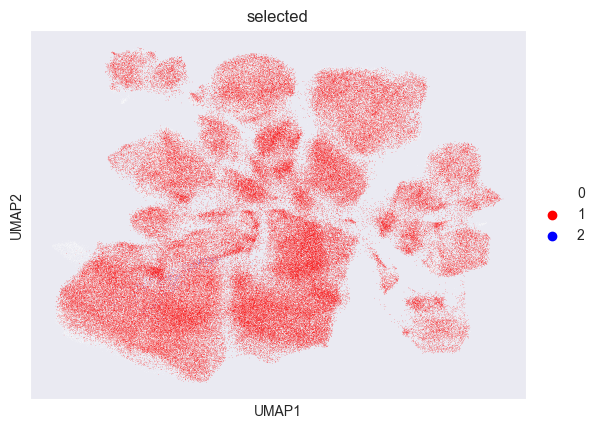

In [23]:
sc.pl.umap(
    rest_data,
    color="selected",
    palette=["white", "red", "blue"]
)

In [24]:
sc.tl.rank_genes_groups(rest_data, groupby="selected", use_raw=False)

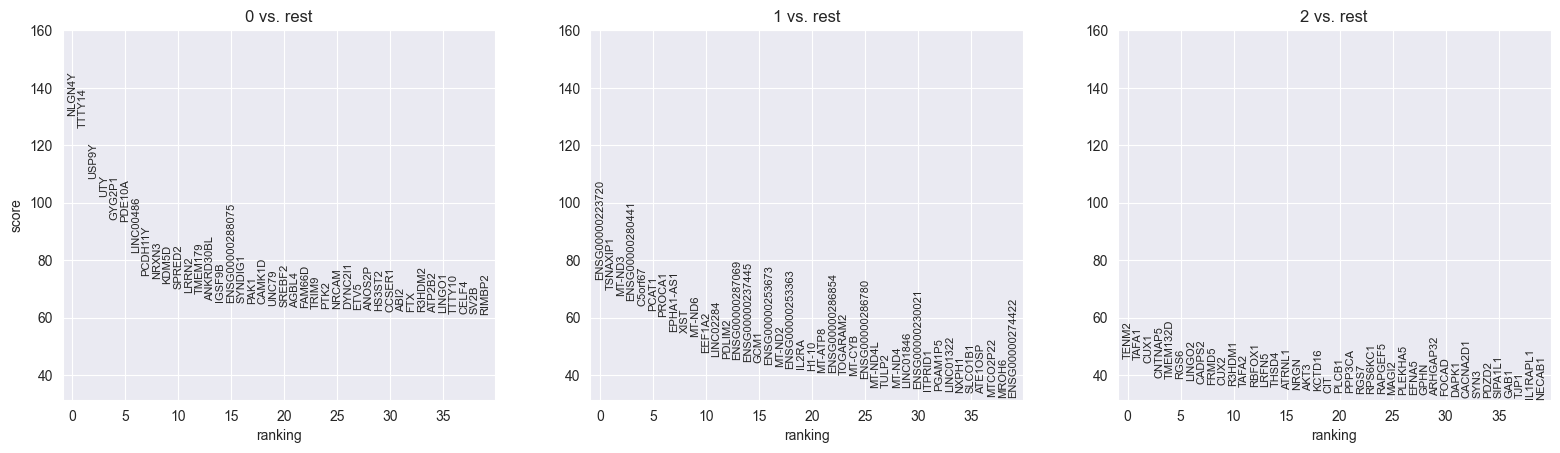

In [25]:
sc.pl.rank_genes_groups(rest_data, groupby="selected",  gene_symbols="feature_name", n_genes=40, figsize=(15, 15))

In [45]:
marker_genes = sc.get.rank_genes_groups_df(rest_data, group="2")
significant_genes = marker_genes[marker_genes['pvals_adj'] < 0.05]
sorted_genes = significant_genes.sort_values(by='scores', ascending=False)

In [46]:
sorted_genes

,names,scores,logfoldchanges,pvals,pvals_adj
0,ENSG00000145934,45.648911,3.056077,1.426327e-150,1.210152e-148
1,ENSG00000183662,45.192760,3.336168,3.270269e-149,2.733100e-147
2,ENSG00000257923,44.135643,3.458370,5.727676e-146,4.635494e-144
3,ENSG00000155052,39.120174,2.638877,1.101645e-130,7.577912e-129
4,ENSG00000151952,38.835541,2.685995,8.958932e-130,6.094356e-128
...,...,...,...,...,...
61422,ENSG00000286474,-98.124191,-25.360046,0.000000e+00,0.000000e+00
61423,ENSG00000286647,-100.449730,-24.832436,0.000000e+00,0.000000e+00
61424,ENSG00000166510,-111.087021,-25.178852,0.000000e+00,0.000000e+00
61425,ENSG00000237445,-121.949974,-25.378433,0.000000e+00,0.000000e+00


In [47]:
changed_names = [rest_data.var["feature_name"][i] for i in sorted_genes["names"]]

In [49]:
gene_list = changed_names[:50]

In [50]:
gene_list

['TENM2',
 'TAFA1',
 'CUX1',
 'CNTNAP5',
 'TMEM132D',
 'RGS6',
 'LINGO2',
 'CADPS2',
 'FRMD5',
 'CUX2',
 'R3HDM1',
 'TAFA2',
 'RBFOX1',
 'LRFN5',
 'THSD4',
 'ATRNL1',
 'NRGN',
 'AKT3',
 'KCTD16',
 'CIT',
 'PLCB1',
 'PPP3CA',
 'RGS7',
 'RPS6KC1',
 'RAPGEF5',
 'MAGI2',
 'PLEKHA5',
 'EFNA5',
 'GPHN',
 'ARHGAP32',
 'FOCAD',
 'DAPK1',
 'CACNA2D1',
 'SYN3',
 'PDZD2',
 'SIPA1L1',
 'GAB1',
 'TJP1',
 'IL1RAPL1',
 'NECAB1',
 'CALM1',
 'RYR2',
 'KALRN',
 'CDH12',
 'MLLT3',
 'SEMA6D',
 'CABP1',
 'CHN1',
 'MAP3K5',
 'KCNIP4']

In [52]:
import gseapy as gp

enr = gp.enrichr(gene_list=gene_list,
                 gene_sets=['KEGG_2021_Human'],   # or 'GO_Biological_Process_2021'
                 organism='Human',                # 'Mouse' also works
                 outdir='enrichr_kegg',
                 cutoff=0.05)  # FDR cutoff

# View results
print(enr.results.head())

          Gene_set                                    Term Overlap  \
0  KEGG_2021_Human                  Rap1 signaling pathway   7/210   
1  KEGG_2021_Human  Adrenergic signaling in cardiomyocytes   5/150   
2  KEGG_2021_Human              Oxytocin signaling pathway   5/154   
3  KEGG_2021_Human              Glucagon signaling pathway   4/107   
4  KEGG_2021_Human               Lipid and atherosclerosis   5/215   

        P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
0  8.670716e-07          0.000137            0                     0   
1  3.582824e-05          0.002140            0                     0   
2  4.063363e-05          0.002140            0                     0   
3  1.475550e-04          0.005828            0                     0   
4  1.958874e-04          0.005849            0                     0   

   Odds Ratio  Combined Score                                         Genes  
0   15.835605      221.035667  SIPA1L1;AKT3;MAGI2;RAPGEF5;CALM1;EFNA